<a href="https://colab.research.google.com/github/JorgeZamo4/Problem_Set_Two/blob/main/Jorge_Zamorano_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

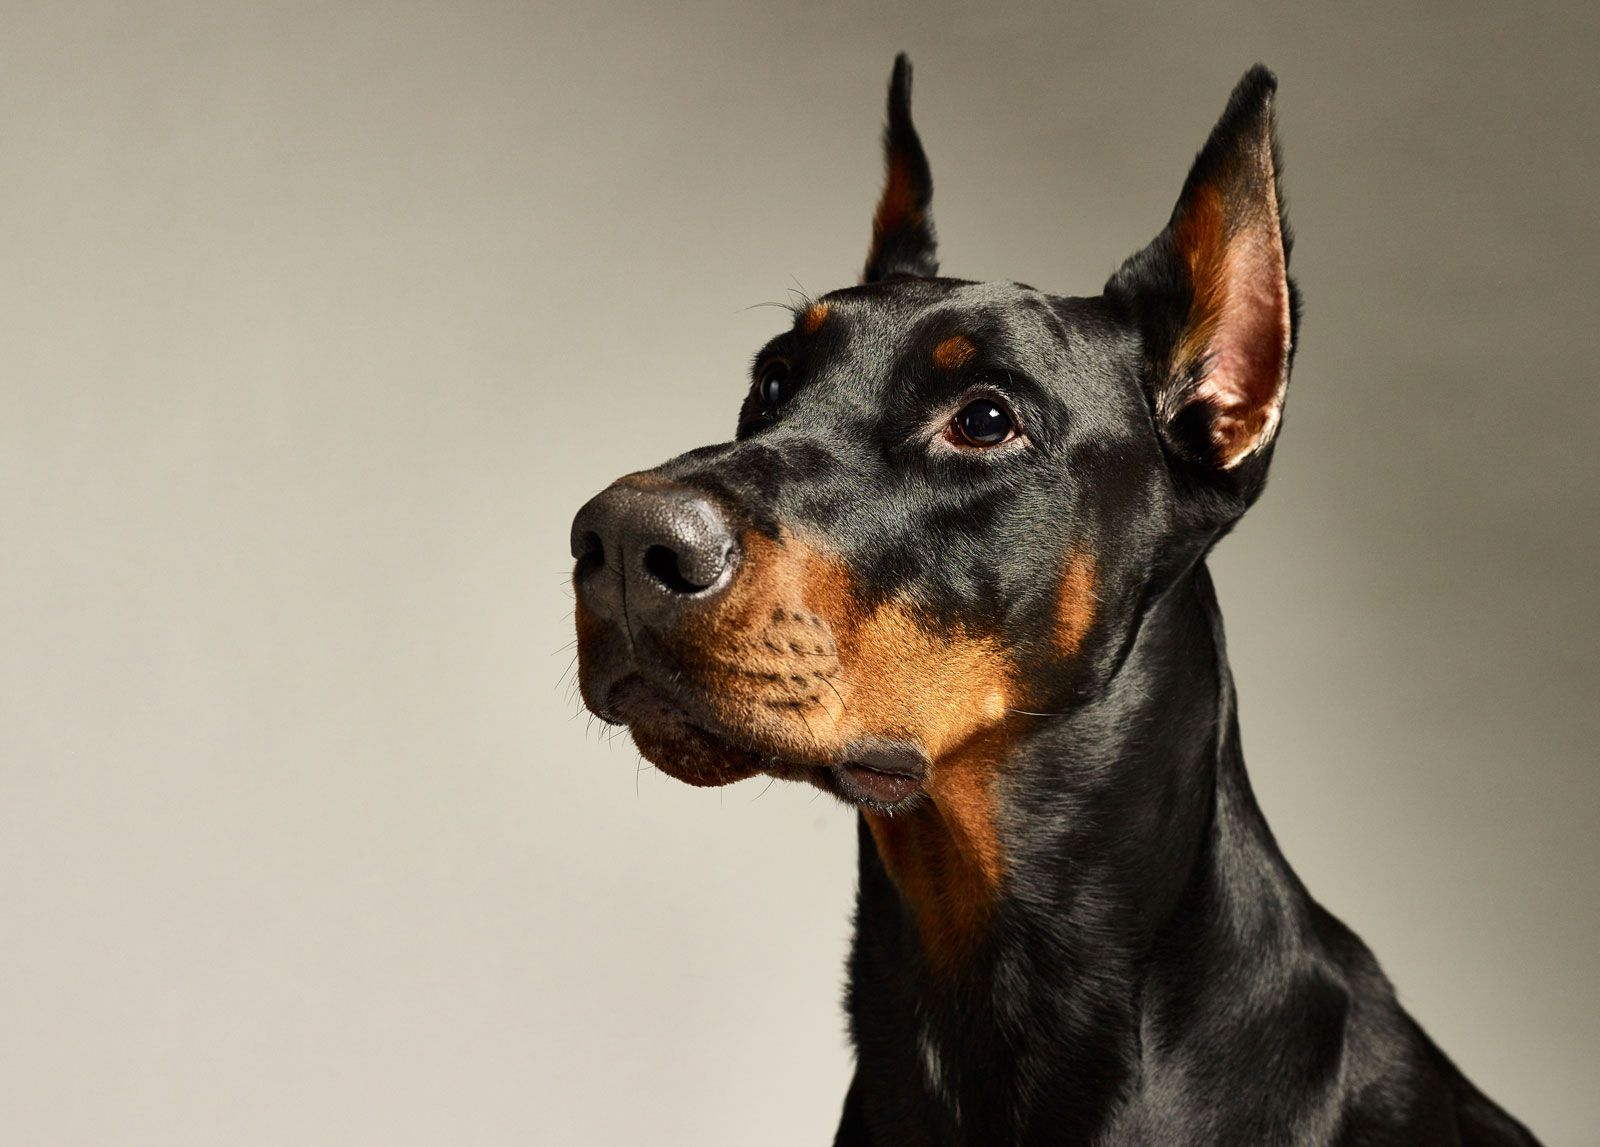

In [ ]:
import requests
from IPython.display import Image, display

# URL of the image you want to load
image_url = "https://cdn.britannica.com/77/234477-050-DF90E2ED/Doberman-pinscher-dog.jpg"
# Download the image
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Display the image directly in the notebook
    display(Image(data=response.content))
else:
    print("Failed to download the image.")


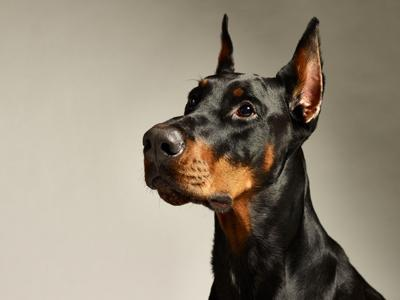

In [ ]:
import requests
from IPython.display import display, Image
from PIL import Image as PILImage
from io import BytesIO

# URL of the image you want to load
image_url = "https://cdn.britannica.com/77/234477-050-DF90E2ED/Doberman-pinscher-dog.jpg"

# Download the image
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the image with Pillow
    img = PILImage.open(BytesIO(response.content))

    # Resize the image to a new width and height
    new_width = 400  # Adjust to your desired width
    new_height = 300  # Adjust to your desired height
    img_resized = img.resize((new_width, new_height))

    # Save the resized image to a BytesIO object
    img_io = BytesIO()
    img_resized.save(img_io, 'JPEG')
    img_io.seek(0)

    # Display the resized image directly in the notebook
    display(Image(data=img_io.read()))
else:
    print("Failed to download the image.")


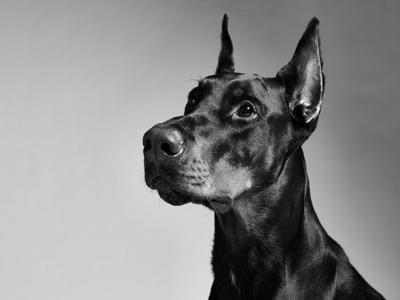

In [ ]:
import requests
from IPython.display import display, Image
from PIL import Image as PILImage
from io import BytesIO

# URL of the image you want to load
image_url = "https://cdn.britannica.com/77/234477-050-DF90E2ED/Doberman-pinscher-dog.jpg"

# Download the image
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the image with Pillow
    img = PILImage.open(BytesIO(response.content))

    # Resize the image to a new width and height
    new_width = 400  # Adjust to your desired width
    new_height = 300  # Adjust to your desired height
    img_resized = img.resize((new_width, new_height))

    # Convert the resized image to grayscale
    img_grayscale = img_resized.convert('L')

    # Save the grayscale image to a BytesIO object
    img_io = BytesIO()
    img_grayscale.save(img_io, 'JPEG')
    img_io.seek(0)

    # Display the grayscale image directly in the notebook
    display(Image(data=img_io.read()))
else:
    print("Failed to download the image.")


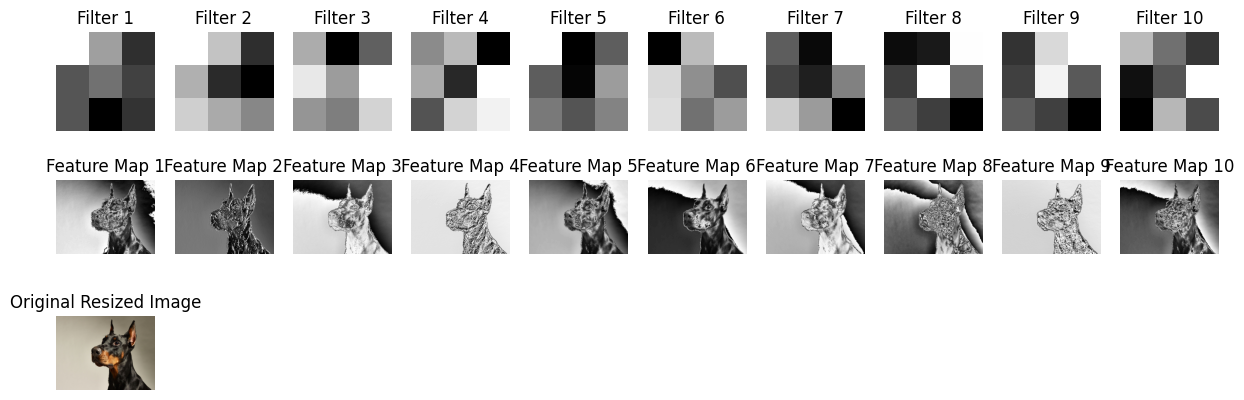

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from PIL import Image, ImageOps

# Define the random convolutional filters
num_filters = 10
filter_size = 3

filters = [np.random.randn(filter_size, filter_size) for _ in range(num_filters)]

# Apply each filter to the grayscale image
feature_maps = []
for idx, filter in enumerate(filters):
    feature_map = convolve(np.array(img_grayscale), filter, mode='mirror')
    feature_maps.append(feature_map)

# Display the filters and feature maps
plt.figure(figsize=(15, 5))

# Display the random convolutional filters
for idx, filter in enumerate(filters):
    plt.subplot(3, num_filters, idx + 1)
    plt.imshow(filter, cmap='gray')
    plt.title(f'Filter {idx + 1}')
    plt.axis('off')

# Display the feature maps
for idx, feature_map in enumerate(feature_maps):
    plt.subplot(3, num_filters, idx + num_filters + 1)
    plt.imshow(feature_map, cmap='gray')
    plt.title(f'Feature Map {idx + 1}')
    plt.axis('off')

# Display the original resized image
plt.subplot(3, num_filters, 2 * num_filters + 1)
plt.imshow(img_resized, cmap='gray')
plt.title('Original Resized Image')
plt.axis('off')

plt.show()
